### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

b)	Is there any evidence that the players overall rating is greater than 80?

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.





#### Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 

2) Perform the test of normality and test of variance in the appropriate places.

In [33]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
import random 
from scipy.stats import shapiro,levene
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc

In [2]:
f = pd.read_csv('fifa_stats.csv')
f.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
f.shape

(2000, 15)

In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

#### a) Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [20]:
age_sample=f['Age'].sample(n=200,random_state=2)
age_sample

278     26
492     27
1266    23
557     21
871     35
        ..
619     25
735     19
627     26
142     30
1274    31
Name: Age, Length: 200, dtype: int64

In [30]:
#a.
random.seed(0)
age_list = list(f.Age)
n = 200
mu = np.mean(age_list)
rand_samp = random.sample(population=age_list,k=200)
xbar = np.mean(rand_samp)
print('Population mean : ',mu)
print('Mean of Sampling distribution is: ',xbar)
sigma = np.std(age_list,ddof=1)
print('Standard deviation is:',sigma)
se = sigma/np.sqrt(n)
print('Standard Error: ',se)
print('sampling error: ',abs(mu-xbar))
print('Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean')


Population mean :  27.2315
Mean of Sampling distribution is:  27.22
Standard deviation is: 3.8590612753574516
Standard Error:  0.272876839681966
sampling error:  0.01150000000000162
Standard error decreases when sample size increases – as the sample size gets closer to the true size of the population, the sample means cluster more and more around the true population mean


#### b) Is there any evidence that the players overall rating is greater than 80?

In [35]:
#b
print(shapiro(f.Overall_rating))
print('P value is less than alpha, Hence population is not normalized')

(0.8525537848472595, 1.0221183102662362e-39)
P value is less than alpha, Hence population is not normalized


In [36]:
1.0221183102662362e-39<0.05

True

In [40]:
# since data is not normal performing wilcoxon test
# ho: overall rating<=80
#h1: overall rating>80
hyp_median = 80
alpha = 0.05
diff = f['Overall_rating'] -hyp_median
test_stats , pvalue = stats.wilcoxon(diff,alternative='greater')
print(pvalue)
if pvalue > alpha:
    print('Fail to reject NULL')
else:
    print('Accept Alternate')

1.0
Fail to reject NULL


#### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [59]:
#c
# ho: preferred foot do not have any impact on potential
# h1: preferred foot siginicant impact on potential

l=f[f['Preferred Foot']=='Left']['Potential']
r=f[f['Preferred Foot']=='Right']['Potential']
print(stats.shapiro(l))
print(stats.shapiro(r))
print(stats.levene(l,r))
print(stats.ttest_ind(l,r))

(0.9422042369842529, 1.7173475098594682e-12)
(0.9369121193885803, 5.342442151473519e-25)
LeveneResult(statistic=1.8561933767199223, pvalue=0.17321833707970302)
Ttest_indResult(statistic=1.5378037422592814, pvalue=0.12425494914461453)


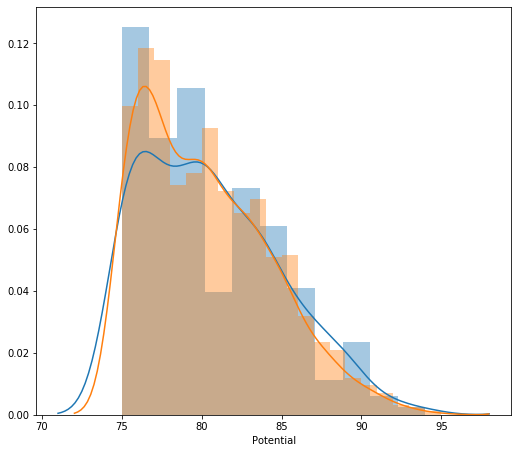

In [57]:
plt.figure(figsize=[8.5,7.5])
sns.distplot(l)
sns.distplot(r)
plt.show()

#### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [63]:
o = f['Overall_rating']
p = f['Potential']
print(stats.shapiro(o))
print(stats.shapiro(p))
print(stats.levene(o,p))
print(stests.ztest(x1=o,x2=p,alternative='two-sided'))
# As P-value is less than 5% thus there is no significant relationship between Overall Rating and Potential

(0.8525537848472595, 1.0221183102662362e-39)
(0.9384800791740417, 5.016414837142018e-28)
LeveneResult(statistic=141.9704137312041, pvalue=3.4406841059319607e-32)
(-17.89175319557915, 1.367376995153535e-71)


#### e) Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [64]:
#e
a=f[f['Skill Moves']==1]['Overall_rating']
b=f[f['Skill Moves']==2]['Overall_rating']
c=f[f['Skill Moves']==3]['Overall_rating']
d=f[f['Skill Moves']==4]['Overall_rating']
e=f[f['Skill Moves']==5]['Overall_rating']
print(stats.f_oneway(a,b,c,d,e))

F_onewayResult(statistic=31.085141826531746, pvalue=3.8236370526660514e-25)


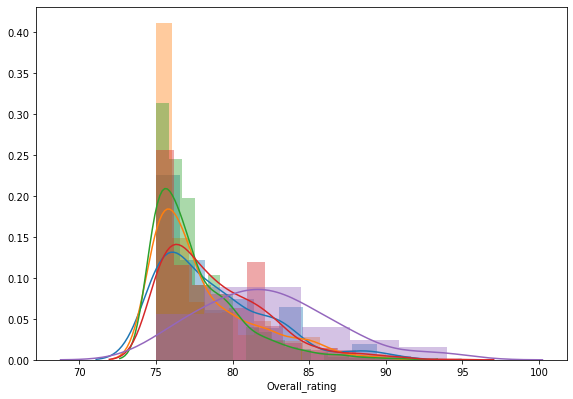

In [67]:
plt.figure(figsize=(9.5,6.5))
sns.distplot(a)
sns.distplot(b)
sns.distplot(c)
sns.distplot(d)
sns.distplot(e)
plt.show()

In [68]:
comp=mc.MultiComparison(data=f['Overall_rating'],groups=f['Skill Moves'])
post_hoc=comp.tukeyhsd(alpha=0.05)
post_hoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.7143,0.0799,-1.4782,0.0496,False
1,3,-1.1876,0.001,-1.8826,-0.4926,True
1,4,0.0901,0.9,-0.6385,0.8187,False
1,5,3.4937,0.001,1.9646,5.0227,True
2,3,-0.4733,0.1091,-1.0061,0.0595,False
2,4,0.8044,0.0013,0.2284,1.3804,True
2,5,4.208,0.001,2.7455,5.6705,True
3,4,1.2777,0.001,0.7968,1.7586,True
3,5,4.6813,0.001,3.2536,6.1089,True
4,5,3.4036,0.001,1.9592,4.8479,True


### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

e)	Perform statistical tests to identify the relation between network and network_type. 





#### Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 

2) Perform the test of normality and test of variance in the appropriate places.

In [74]:
p = pd.read_csv(r'C:\Users\SACHIN\Desktop\Stats for ML\Stats_mini\Set-A\phone.csv')
p.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [110]:
p.shape

(820, 6)

#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [80]:
n=len(p.duration)
xbar = np.mean(p.duration)
sigma = np.std(p.duration,ddof=1)
se = sigma/np.sqrt(n)
print("Confidence Interval with 95%:",stats.norm.interval(0.95,loc=xbar,scale=se))

Confidence Interval with 95%: (141.1778397288302, 147.4320313908407)


In [81]:
n=len(p.duration)
xbar = np.mean(p.duration)
sigma = np.std(p.duration,ddof=1)
se = sigma/np.sqrt(n)
print("Confidence Interval with 99%:",stats.norm.interval(0.99,loc=xbar,scale=se))

Confidence Interval with 99%: (140.19523500408818, 148.41463611558274)


In [87]:
#range with 99% is wider

### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [93]:
p['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [95]:
o = p.network.value_counts().values
e = np.array([117, 117, 117, 117, 117, 117, 117])

In [99]:
len(p)/7

117.14285714285714

In [97]:
chisquare(o,e)

Power_divergenceResult(statistic=307.7863247863248, pvalue=1.7542899243536984e-63)

In [94]:
#since p value is less than alpha reject null hypothesis and it can be inferred that networks are not equally distributed

### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

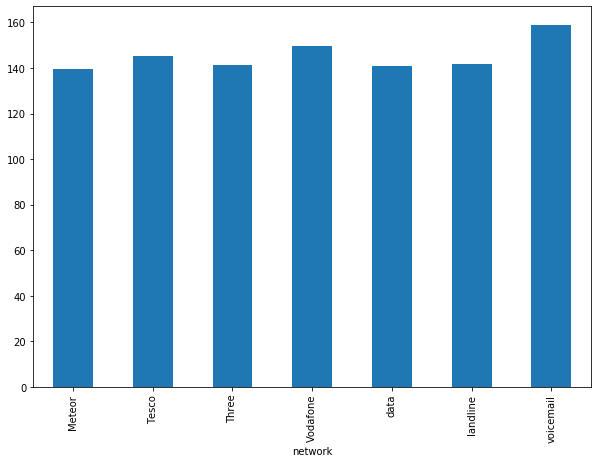

In [105]:
p.groupby('network')['duration'].mean().plot(kind='bar',figsize=(10,7))


In [106]:
# from the graph, we can interpret that average duration of voicemail is the highest followed by vodafone and tesco.

### d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [128]:
dat=p[p['item']=='data']['duration']
cal=p[p['item']=='call']['duration']
sms=p[p['item']=='sms']['duration']
print(stats.shapiro(dat))
print(stats.shapiro(cal))
print(stats.shapiro(sms))
print(stats.levene(dat,cal,sms))
print(stats.f_oneway(dat,cal,sms))

(0.9912639856338501, 0.48521795868873596)
(0.9973042011260986, 0.7803382277488708)
(0.9943404197692871, 0.37839275598526)
LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)
F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)


In [129]:
#since p-value is greater than alpha, we can say that mean of all the treatments as same

### e) Perform statistical tests to identify the relation between network and network_type.

##### H0: The network and network type are independant

##### H1: the network and network type are dependant

In [131]:
obs=pd.crosstab(p['network'],p['network_type'])
stats.chi2_contingency(obs)

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

# END